<a href="https://colab.research.google.com/github/JorgeFCRodrigues/Machine-Learning/blob/main/Projeto_binarizacao_de_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from IPython.display import display
import urllib.request

# busca uma imagem da internet e salva nos locais
image_url = 'https://blog.useartools.com.br/wp-content/uploads/2024/05/a-criacao-de-adao-michelangelo-1508-1512.png'
output_filename = 'a-criacao-de-adao-michelangelo-1508-1512.png'

urllib.request.urlretrieve(image_url, output_filename)
print(f"Image downloaded to {output_filename}")

Image downloaded to a-criacao-de-adao-michelangelo-1508-1512.png


In [2]:
caminho_imagem = '/content/a-criacao-de-adao-michelangelo-1508-1512.png'
imagem_original = Image.open(caminho_imagem)

In [3]:
def converter_para_cinza(imagem):
    # Função converte a imagem para RGB se ela já não estiver em RGB
    if imagem.mode != 'RGB':
        imagem = imagem.convert('RGB')

    # função que pega a alura e largura da imagem
    largura, altura = imagem.size
    imagem_cinza = Image.new('L', (largura, altura))

    # função que faz a matriz da imagem de acordo com a altura e largura e transforma em escala cinza
    for y in range(altura):
      for x in range(largura):
        r, g, b = imagem.getpixel((x, y))
        valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
        imagem_cinza.putpixel((x, y), valor_cinza)

    return imagem_cinza

In [4]:
# função que faz a binarização da imagem aplicando limiar e pegando a matriz da imagem
def binarizar_imagem(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_binaria = Image.new('1', (largura, altura))

# fazendo a matriz e aplicando a binarização pixel por pixel
  for y in range(altura):
    for x in range(largura):
      valor_cinza = imagem_cinza.getpixel((x,y))
      valor_binario = 1 if valor_cinza > limiar else 0
      imagem_binaria.putpixel((x,y), valor_binario)

  return imagem_binaria

Imagem Original:


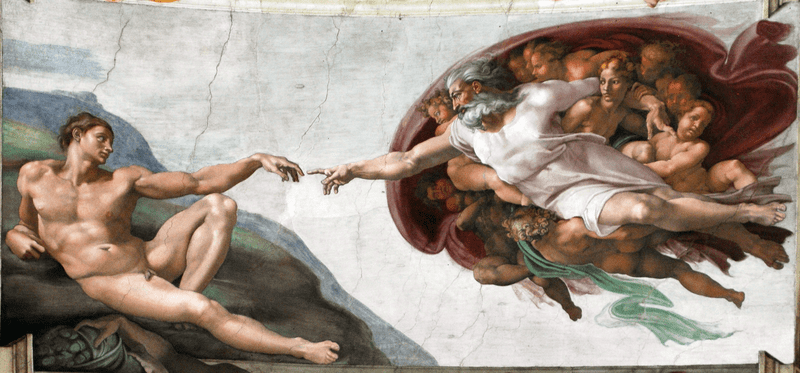

Imagem em Tons de Cinza:


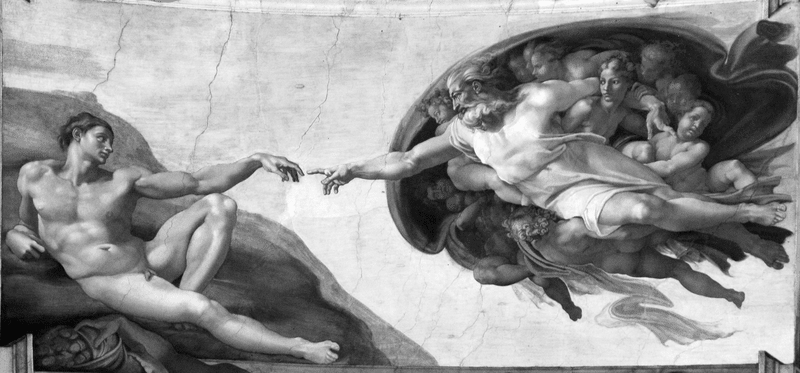

Imagem Binarizada:


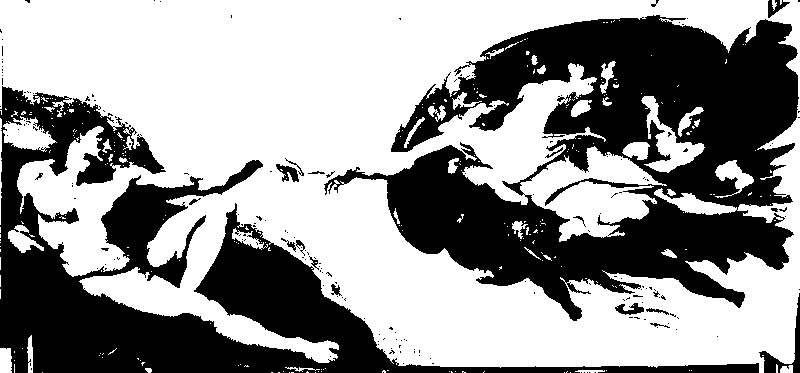

In [5]:
# Converter a imagem para cinza
imagem_cinza = converter_para_cinza(imagem_original)

# Binarizar a imagem
imagem_binaria = binarizar_imagem(imagem_cinza)

# Exibir as imagens processadas
print("Imagem Original:")
display(imagem_original)

print("Imagem em Tons de Cinza:")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_binaria)